### Import librabries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

In [3]:
# Initial data exploration
print(df.shape)
print(df.info())
print(df.head())

(16598, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            

In [4]:
# Data description
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


### Data cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [6]:
# Percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


The columns with missing values are Year and Publisher.
Year has about 1.63% missing values, and Publisher has about 0.35% missing values. The rest of the columns have no missing values. For Year, we might drop rows with missing values and for Publisher, we could consider filling in missing values with 'Unknown' or the most frequent publisher name.

In [7]:
# Fill missing values in 'Publisher' with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)
print(df['Publisher'].isnull().sum())

0


In [8]:
# Drop rows with missing values in 'Year' column
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)
print(df['Year'].isnull().sum())

0


### Summary statistics

In [9]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000   
mean    8292.868194   2006.406443      0.265415      0.147554      0.078661   
std     4792.669778      5.828981      0.821591      0.508766      0.311557   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4136.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8295.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12441.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16327.000000  16327.000000  
mean       0.048325      0.540232  
std        0.189885      1.565732  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


Total sales by region:
Global_Sales    8815.86
NA_Sales        4333.43
EU_Sales        2409.12
JP_Sales        1284.30
Other_Sales      789.01
dtype: float64


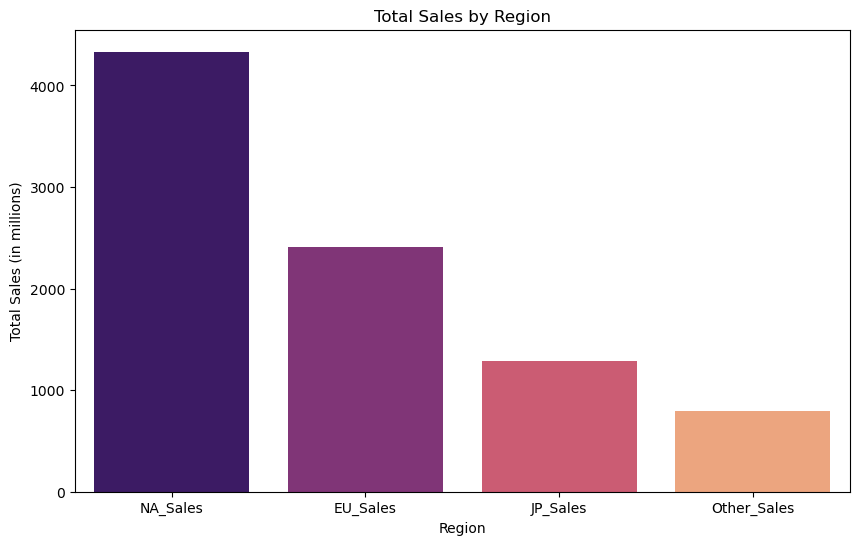

In [10]:
# Total sales by region
df['Global_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
total_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values(ascending=False).round(2)
print(f'Total sales by region:\n{total_sales}')
# Visualization of sales distribution by region
plt.figure(figsize=(10,6))
sns.barplot(x=total_sales.index[1:], y=total_sales.values[1:], palette='magma')
plt.title('Total Sales by Region')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Region')
plt.show()

Total sales by region: North America has the highest sales, followed by Europe, Japan, and Other regions. Global sales is the sum of all regional sales.

### Frequency distribution of game genres

Game genre distribution:
Genre
Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: count, dtype: int64


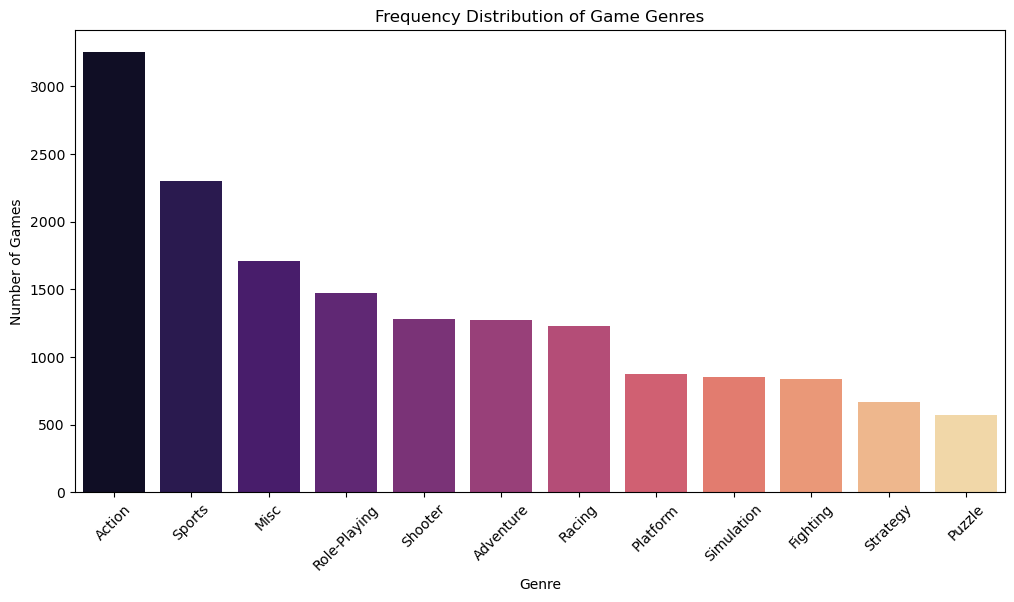

In [11]:
# Genre distribution
genre_counts = df['Genre'].value_counts()
print(f'Game genre distribution:\n{genre_counts}')
# Visualization of genre distribution
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='magma')
plt.title('Frequency Distribution of Game Genres')
plt.ylabel('Number of Games')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

The most common genre is Action with 3253 games, followed by Sports and Misc genres with 2304 and 1710 games respectively. The least common genres are Strategy and Puzzle with 671 and 571 games respectively.

Platforms by number of games:
Platform
DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


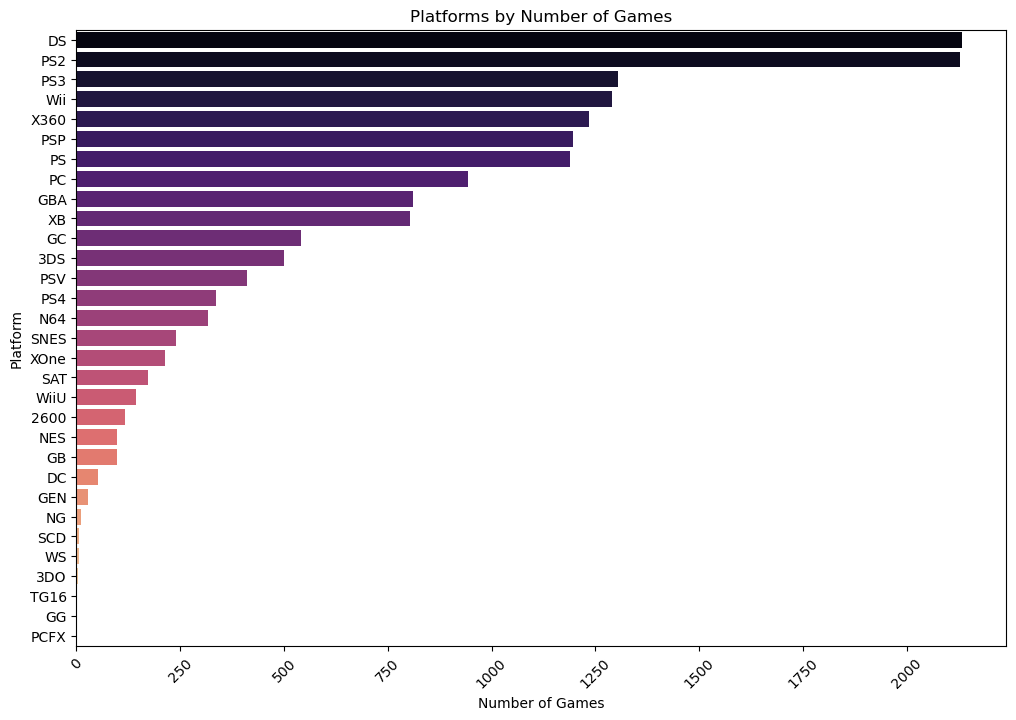

In [12]:
# Platform distribution
platform_counts = df['Platform'].value_counts()
print(f'Platforms by number of games:\n{platform_counts}')
# Visualization of platform distribution
plt.figure(figsize=(12, 8))
sns.barplot(y=platform_counts.index, x=platform_counts.values, palette='magma')
plt.title('Platforms by Number of Games')
plt.ylabel('Platform')
plt.xlabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

The most common platform is DS with 2133 games, followed closely by PS2 with 2127 games. The least common platforms are GG and PCFX with only 1 game each.

### Sales analysis by genre and platform

Sales analysis by genre:
              count      sum  mean
Genre                             
Action         3253  1721.86  0.53
Sports         2304  1308.84  0.57
Shooter        1282  1025.69  0.80
Role-Playing   1471   923.75  0.63
Platform        876   828.82  0.95
Misc           1710   796.99  0.47
Racing         1226   726.54  0.59
Fighting        836   444.08  0.53
Simulation      851   389.88  0.46
Puzzle          571   241.69  0.42
Adventure      1276   234.56  0.18
Strategy        671   173.16  0.26


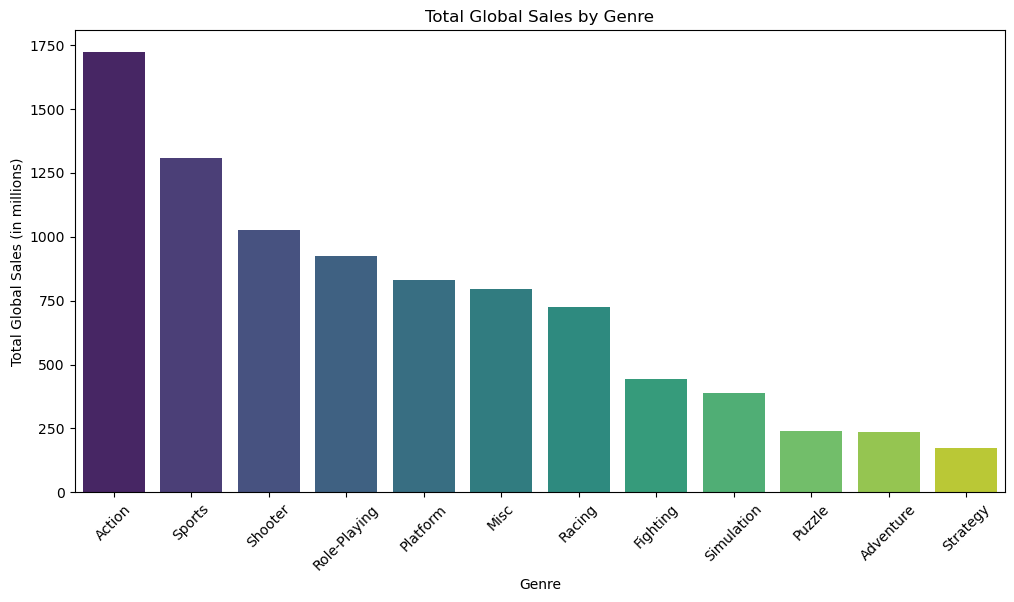

In [13]:
# Sales analysis by genre
genre_sales = df.groupby('Genre')['Global_Sales'].agg(['count', 'sum', 'mean']).round(2)
genre_sales = genre_sales.sort_values(by='sum', ascending=False)
print(f'Sales analysis by genre:\n{genre_sales}')
# Visualization of sales by genre
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales['sum'], palette='viridis')
plt.title('Total Global Sales by Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

The genre with the highest total sales is Action with 1721.86 million, followed by Sports and Shooter with 1308.84 million and 1025.69 million respectively. The genre with the highest average sales per game is Platform with 0.95 million, followed by Shooter with 0.80 million and Role-Playing with 0.63 million. The genre with the lowest total sales is Strategy with 173.16 million, while the genre with the lowest average sales per game is Adventure with 0.18 million.

Sales analysis by platform:
          count      sum  mean
Platform                      
PS2        2127  1233.56  0.58
X360       1235   969.31  0.78
PS3        1304   949.39  0.73
Wii        1290   909.20  0.70
DS         2133   817.94  0.38
PS         1189   727.56  0.61
GBA         811   312.88  0.39
PSP        1197   291.66  0.24
PS4         336   278.16  0.83
GB           97   254.43  2.62
PC          943   254.24  0.27
XB          803   251.57  0.31
NES          98   251.05  2.56
3DS         500   246.18  0.49
N64         316   218.01  0.69
SNES        239   200.04  0.84
GC          542   196.73  0.36
XOne        213   141.10  0.66
2600        116    86.48  0.75
WiiU        143    81.79  0.57
PSV         412    61.64  0.15
SAT         173    33.59  0.19
GEN          27    28.35  1.05
DC           52    15.95  0.31
SCD           6     1.86  0.31
NG           12     1.44  0.12
WS            6     1.42  0.24
TG16          2     0.16  0.08
3DO           3     0.10  0.03
GG         

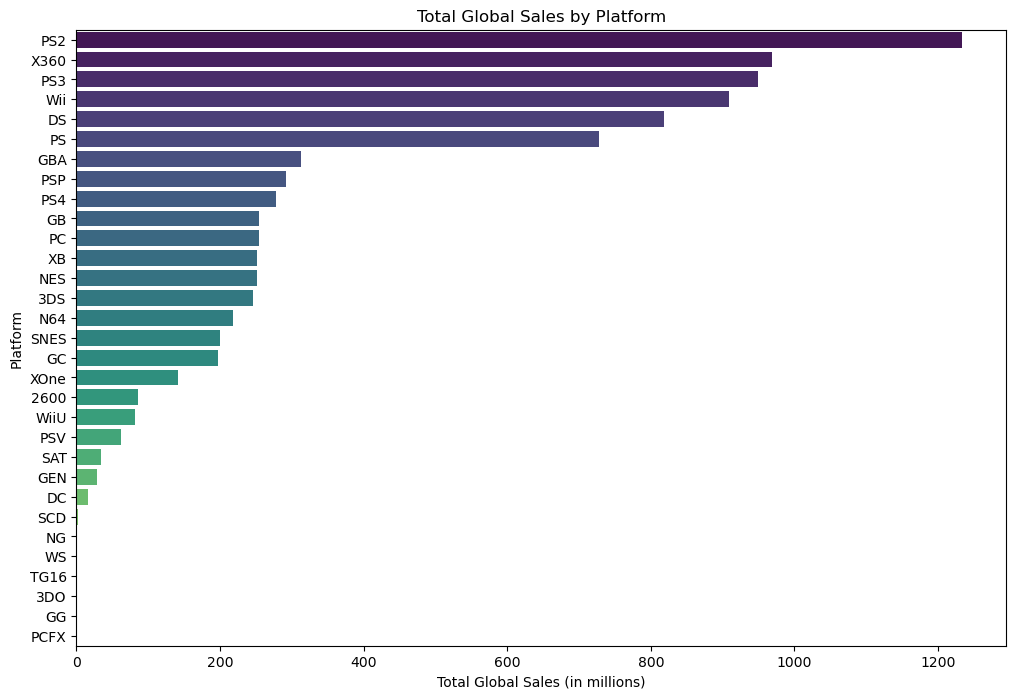

In [14]:
# Sales analysis by pflatform
platform_sales = df.groupby('Platform')['Global_Sales'].agg(['count', 'sum', 'mean']).round(2)
platform_sales = platform_sales.sort_values(by='sum', ascending=False)
print(f'Sales analysis by platform:\n{platform_sales}')
# Visualization of sales by platform
plt.figure(figsize=(12,8))
sns.barplot(y=platform_sales.index, x=platform_sales['sum'], palette='viridis')
plt.title('Total Global Sales by Platform')
plt.ylabel('Platform')
plt.xlabel('Total Global Sales (in millions)')
plt.show()

Top 5 platforms published by count are DS, PS2, PS3, Wii, and PSP with 2133, 2127, 1304, 1290, and 1197 games respectively. The platform with the highest number of games published is DS with 2133 games, followed closely by PS2 with 2127 games and PS3 with 1304 games. The platform with the lowest number of games published is GG and PCFX with only 1 game each.

Top 5 platforms by total sales are PS2, X360, PS3, Wii, and DS with 1233.56, 969.31, 949.39, 909.20, and 817.94 million respectively. The platform with the lowest total sales is PCFX with only 0.03 million.

Top 5 platforms by average sales per game are GB, NES, SNES, PS4, and X360 with 2.62, 2.56, 0.84, 0.83, and 0.78 million respectively. The platform with the lowest average sales per game is NG with 0.12 million.

Cross-referencing the top platforms by count, total sales, and average sales per game, we can see that DS and PS2 are among the top platforms in all three categories. X360 and PS3 also appear in the top platforms by total sales and average sales per game. This indicates that these platforms have a strong presence in the market with a high number of games published, high total sales, and high average sales per game.

### Sales trends over time by year

Sales trends over time by year:
      count     sum  mean
Year                     
1980      9   11.38  1.26
1981     46   35.68  0.78
1982     36   28.88  0.80
1983     17   16.80  0.99
1984     14   50.35  3.60
1985     14   53.95  3.85
1986     21   37.08  1.77
1987     16   21.70  1.36
1988     15   47.21  3.15
1989     17   73.45  4.32
1990     16   49.37  3.09
1991     41   32.23  0.79
1992     43   76.14  1.77
1993     60   45.99  0.77
1994    121   79.22  0.65
1995    219   88.11  0.40
1996    263  199.15  0.76
1997    289  201.07  0.70
1998    379  256.33  0.68
1999    338  251.12  0.74
2000    349  201.63  0.58
2001    482  331.49  0.69
2002    829  394.97  0.48
2003    775  357.61  0.46
2004    763  418.85  0.55
2005    941  459.41  0.49
2006   1008  520.52  0.52
2007   1202  610.44  0.51
2008   1428  678.49  0.48
2009   1431  667.10  0.47
2010   1259  600.36  0.48
2011   1139  515.93  0.45
2012    657  363.30  0.55
2013    546  367.98  0.67
2014    582  337.10  0.58
2015  

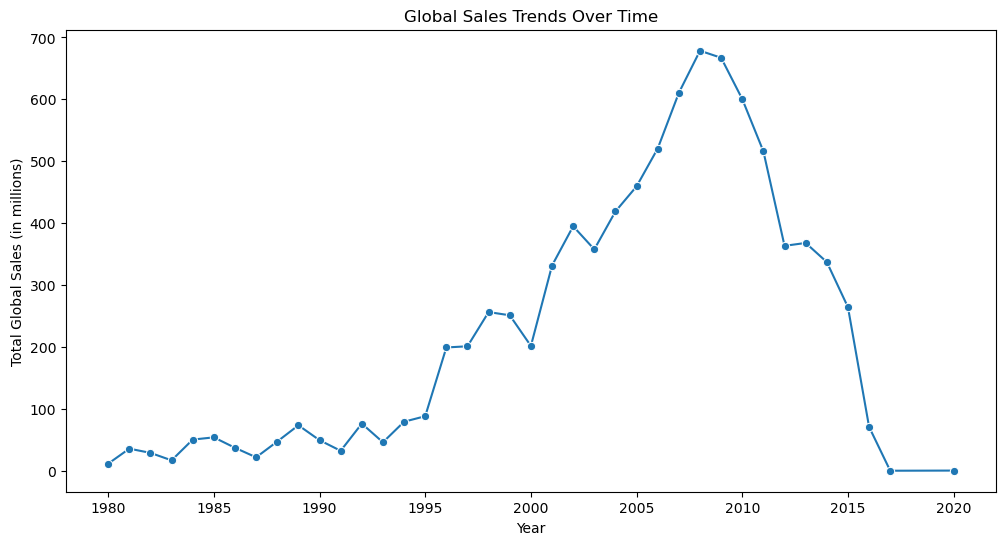

In [15]:
# Group by year to see sales trends over time
yearly_sales = df.groupby('Year')['Global_Sales'].agg(['count', 'sum', 'mean']).round(2)
yearly_sales = yearly_sales.sort_index()
print(f'Sales trends over time by year:\n{yearly_sales}')
# Visualization of sales trends over time
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales, x=yearly_sales.index, y='sum', marker='o')
plt.title('Global Sales Trends Over Time')
plt.ylabel('Total Global Sales (in millions)')
plt.xlabel('Year')
plt.show()

The year with the highest number of games released is 2009 with 1431 games, followed closely by 2008 with 1428 games and 2007 with 1202 games. The year with the lowest number of games released is 2020 with only 1 game.

The year with the highest total sales is 2008 with 678.49 million, followed by 2009 with 667.10 million and 2007 with 610.44 million. The year with the lowest total sales is 2017 with only 0.05 million.

The year with the highest average sales per game is 1989 with 4.32 million, followed by 1985 with 3.85 million and 1984 with 3.60 million. The year with the lowest average sales per game is 2017 with only 0.02 million.

Cross-referencing the top years by count, total sales, and average sales per game, we can see that the late 2000s (2007-2009) were a peak period for video game releases and sales. This period saw a high number of games released, high total sales, and relatively high average sales per game. The early years (1980s) also show high average sales per game, indicating that while fewer games were released, they tended to sell well on average.

### Regional sales comparison

Regional sales contribution by genres:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          861.80    516.48    158.66       184.92
Sports          670.09    371.34    134.76       132.65
Shooter         575.16    310.45     38.18       101.90
Platform        445.99    200.67    130.65        51.51
Misc            402.48    213.82    106.67        74.02
Racing          356.93    236.32     56.61        76.68
Role-Playing    326.50    187.58    350.29        59.38
Fighting        220.74    100.00     87.15        36.19
Simulation      181.78    113.20     63.54        31.36
Puzzle          122.01     50.53     56.68        12.47
Adventure       102.06     63.79     52.01        16.70
Strategy         67.89     44.94     49.10        11.23


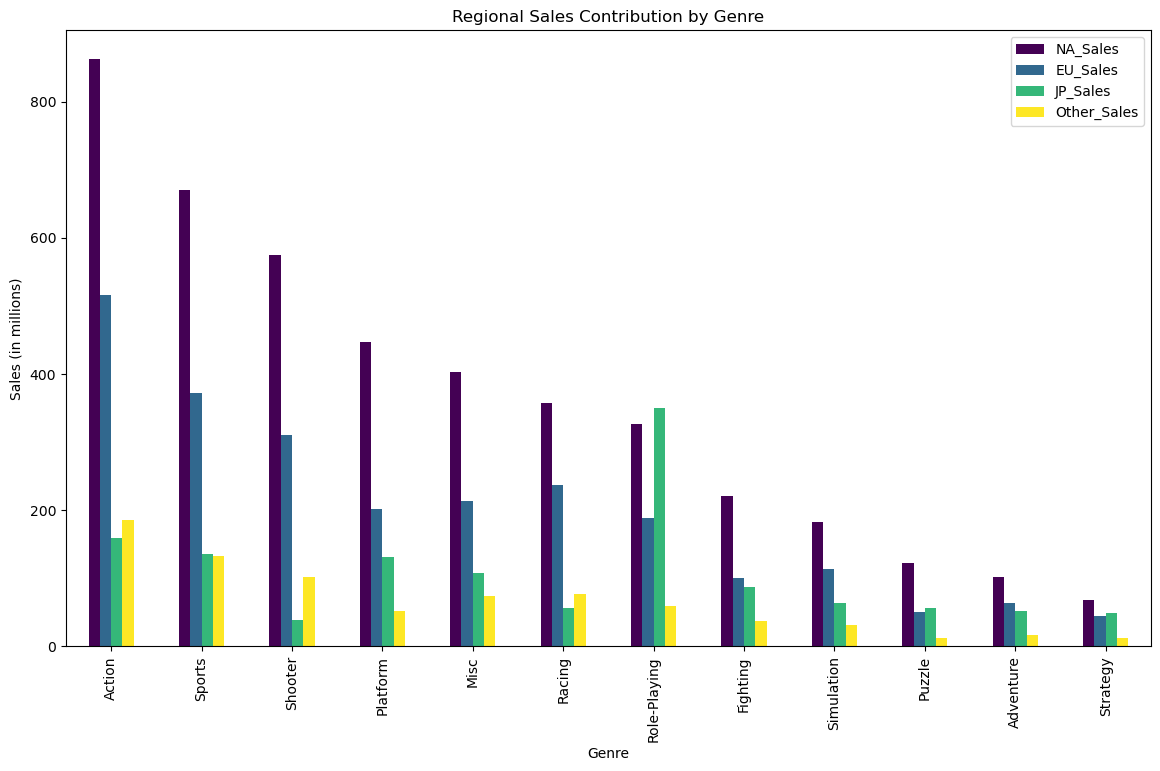

In [16]:
# Regional sales contribution by genres
region_genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().round(2)
region_genre_sales = region_genre_sales.sort_values(by='NA_Sales', ascending=False)
print(f'Regional sales contribution by genres:\n{region_genre_sales}')
# Visualization of regional sales by genre
region_genre_sales.plot(kind='bar', figsize=(14,8), colormap='viridis')
plt.title('Regional Sales Contribution by Genre')
plt.ylabel('Sales (in millions)')
plt.xlabel('Genre')
plt.show()

North America has the highest sales across all genres, followed by Europe except for Role-Playing games where Japan leads. Japan has significantly higher sales in Role-Playing games compared to Other regions. Japan and Other regions have fluctuating sales across different genres; action, shooter, and racing games perform well in Other regions while other genres have lower sales.

In [17]:
# Percentage contribution of each region to global sales
region_percentage = (total_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] / total_sales['Global_Sales'] * 100).round(2)
print(f'Percentage contribution of each region to global sales:\n{region_percentage}')

Percentage contribution of each region to global sales:
NA_Sales       49.15
EU_Sales       27.33
JP_Sales       14.57
Other_Sales     8.95
dtype: float64


The percentage contribution of each region to global sales shows that North America contributes nearly half of the global sales, followed by Europe with over a quarter. Japan and Other regions contribute smaller but still significant portions to the global sales.
Individual genres show varying regional preferences, with some genres like Role-Playing being more popular in Japan, while others like Action and Sports have strong sales in North America and Europe.
These insights can help game developers and publishers tailor their strategies to target specific regions and genres more effectively.

Correlation Matrix:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.768936  0.451285     0.634508      0.941269
EU_Sales      0.768936  1.000000  0.436414     0.726266      0.903275
JP_Sales      0.451285  0.436414  1.000000     0.290653      0.612800
Other_Sales   0.634508  0.726266  0.290653     1.000000      0.747994
Global_Sales  0.941269  0.903275  0.612800     0.747994      1.000000


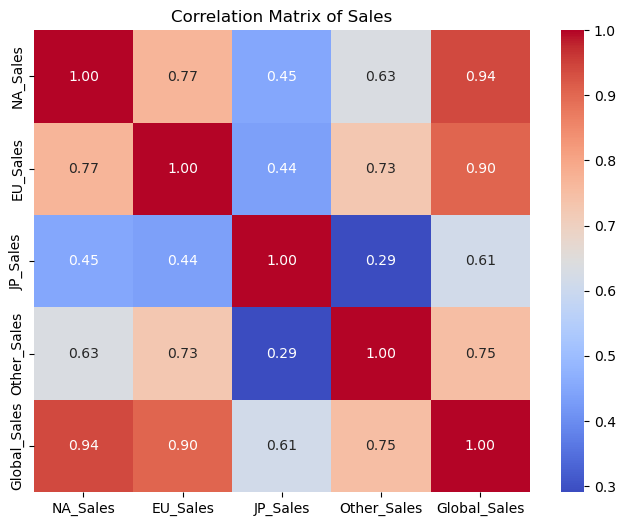

In [18]:
# Correlation analysis
correlation_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
print(f'Correlation Matrix:\n{correlation_matrix}')
plt.figure(figsize=(8,6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Sales')
plt.show()

The correlation matrix shows strong positive correlations between all regional sales and global sales, indicating that higher sales in any region tend to contribute to higher global sales. North America and Europe have the strongest correlation (0.77), suggesting that games popular in one region are often popular in the other as well. Japan has a moderate correlation with both North America (0.45) and Europe (0.44), indicating some overlap in game preferences but also distinct differences. Other regions show moderate correlations with all other regions, suggesting a more varied market.

North America and Europe are the dominant markets, these regions have the highest sales and the strongest correlation with global sales. Japan, while having lower correlations, shows a strong preference for Role-Playing games, indicating a unique market segment. Other regions, while contributing less to total sales, still play a significant role in the global market.

### Insights questions


Who Questions:

Top 10 publishers by global sales:
Publisher
Nintendo                        1784.23
Electronic Arts                 1093.21
Activision                       721.06
Sony Computer Entertainment      607.27
Ubisoft                          473.33
Take-Two Interactive             399.45
THQ                              340.32
Konami Digital Entertainment     278.37
Sega                             270.68
Namco Bandai Games               253.47
Name: Global_Sales, dtype: float64
Percentage of overall market controlled by top 10 publishers:
Publisher
Nintendo                        20.24
Electronic Arts                 12.40
Activision                       8.18
Sony Computer Entertainment      6.89
Ubisoft                          5.37
Take-Two Interactive             4.53
THQ                              3.86
Konami Digital Entertainment     3.16
Sega                             3.07
Namco Bandai Games               2.88
Name: Global_Sales, dtype: float64


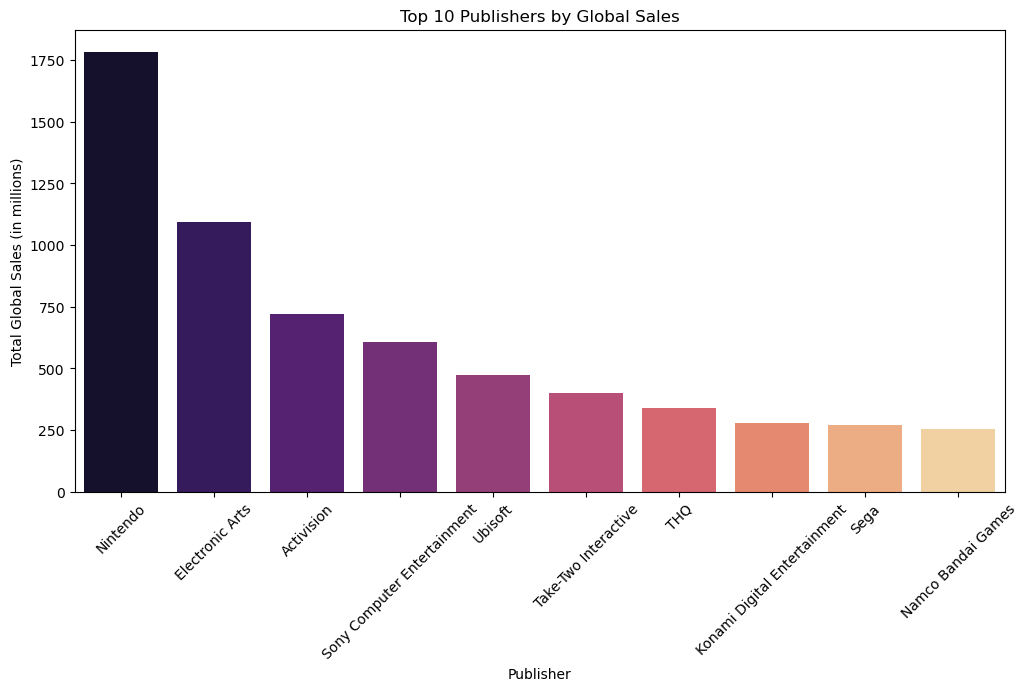

In [19]:
# 1. Who are the top 10 publishers by global sales, and what percentage of the overall market do they control?
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
total_sales = df['Global_Sales'].sum()
publisher_percentage = (publisher_sales / total_sales * 100).round(2)
print(f'Top 10 publishers by global sales:\n{publisher_sales}')
print(f'Percentage of overall market controlled by top 10 publishers:\n{publisher_percentage}')
# Visualization of top 10 publishers by global sales
plt.figure(figsize=(12,6))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values, palette='magma')
plt.title('Top 10 Publishers by Global Sales')
plt.ylabel('Total Global Sales (in millions)')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.show()


The top 10 publishers control a significant portion of the overall market, with Nintendo alone accounting for over 20% of global sales with global sales of 1784.23 million, followed by Electronic Arts with 1093.21 million with 12.40%. The combined market share of the top 10 publishers is approximately 69.78%, indicating a high level of market concentration among leading publishers.

In [20]:
# 2. Who dominates sales in the Role-Playing genre, and how may unique franchises (e.g. Pokemon) contribute to their success?
role_playing_sales = df[df['Genre'] == 'Role-Playing']
role_playing_publisher_sales = role_playing_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(1)
role_playing_franchises = role_playing_sales['Name'].str.contains('Pokemon', case=False).sum()
print(f'Top publisher in Role-Playing genre:\n{role_playing_publisher_sales}')
print(f'Number of unique Pokemon franchises in Role-Playing genre: {role_playing_franchises}')



Top publisher in Role-Playing genre:
Publisher
Nintendo    284.53
Name: Global_Sales, dtype: float64
Number of unique Pokemon franchises in Role-Playing genre: 20


The Role-Playing genre is dominated by Nintendo, which has the highest global sales of 284.53 million in this genre. The Pokemon series significantly contributes to Nintendo's success in the Role-Playing genre, with 20 unique franchises, indicating a strong and consistent presence in this market segment.

In [21]:
# 3. Who dominates sales in the Action genre in the North American market, and what name are their top 3 games?
action_sales_na = df[df['Genre'] == 'Action']
top_publisher_action_na = action_sales_na.groupby('Publisher')['NA_Sales'].sum().sort_values(ascending=False).head(1)
top_publisher_name = top_publisher_action_na.index[0]
top_games_action_na = action_sales_na[action_sales_na['Publisher'] == top_publisher_name].nlargest(3, 'NA_Sales')['Name']
print(f'Top publisher in Action genre (NA market):\n{top_publisher_action_na}')
print(f'\nTop 3 games by {top_publisher_name} in NA market:\n{top_games_action_na}')


Top publisher in Action genre (NA market):
Publisher
Take-Two Interactive    101.45
Name: NA_Sales, dtype: float64

Top 3 games by Take-Two Interactive in NA market:
23               Grand Theft Auto V
17    Grand Theft Auto: San Andreas
24      Grand Theft Auto: Vice City
Name: Name, dtype: object


The Action genre in the North American market is dominated by Take-Two Interactive, which has the highest sales of 101.45 million in this genre. Their top 3 games contributing to this success are "Grand Theft Auto V", "Grand Theft Auto: San Andreas", and "Grand Theft Auto: Vice City", all of which are part of the highly popular Grand Theft Auto series.

In [22]:
# 4. Who are the publishers with highest average global sales per game in the Shooter genre, and why might they outperform others?
shooter_sales = df[df['Genre'] == 'Shooter']
shooter_publisher_avg_sales = shooter_sales.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(3).round(2)
print(f'Publishers with highest average global sales per game in Shooter genre:\n{shooter_publisher_avg_sales}')


Publishers with highest average global sales per game in Shooter genre:
Publisher
Microsoft Game Studios    3.41
Nintendo                  2.90
Activision                1.91
Name: Global_Sales, dtype: float64


The highest average sales per game for publishers in the Shooter genre is held by Microsoft Game Studios with 3.41 million, followed by Nintendo with 2.90 million and Activision with 1.91 million. These publishers likely outperform others due to their strong brand recognition, popular game franchises, and effective marketing strategies that resonate well with the Shooter genre audience. 

When Questions:

In [23]:
# 5. When did global sales peak, and what genres or platforms drove those peaks?
yearly_sales = df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).head()
print(f'Years with peak global sales:\n{yearly_sales.to_dict()}\n')
for peak_year in yearly_sales.index:
    peak_genre = df[df['Year'] == peak_year]['Genre'].mode().iloc[0]
    peak_platform = df[df['Year'] == peak_year]['Platform'].mode().iloc[0]
    print(f'In the peak year {peak_year}, the top genre was {peak_genre} and the top platform was {peak_platform}.')


Years with peak global sales:
{2008: 678.49, 2009: 667.1, 2007: 610.44, 2010: 600.36, 2006: 520.52}

In the peak year 2008, the top genre was Action and the top platform was DS.
In the peak year 2009, the top genre was Action and the top platform was DS.
In the peak year 2007, the top genre was Action and the top platform was DS.
In the peak year 2010, the top genre was Action and the top platform was DS.
In the peak year 2006, the top genre was Action and the top platform was PS2.


The peak years for global sales were primarily driven by the Action genre, which was the top genre in all peak years. The DS platform was the leading platform in four out of the five peak years, indicating its significant role in driving sales during this period. The PS2 platform also contributed to peak sales in 2006. This suggests that both the Action genre and these platforms were key factors in achieving high global sales during these years.

The platform DS had the most game releases in the year 2008 with 492 games released.
The platform Wii had the most game releases in the year 2009 with 325 games released.
The platform PS2 had the most game releases in the year 2002 with 280 games released.

The overall platform with the most game releases was DS in 2008 with 492 games released.


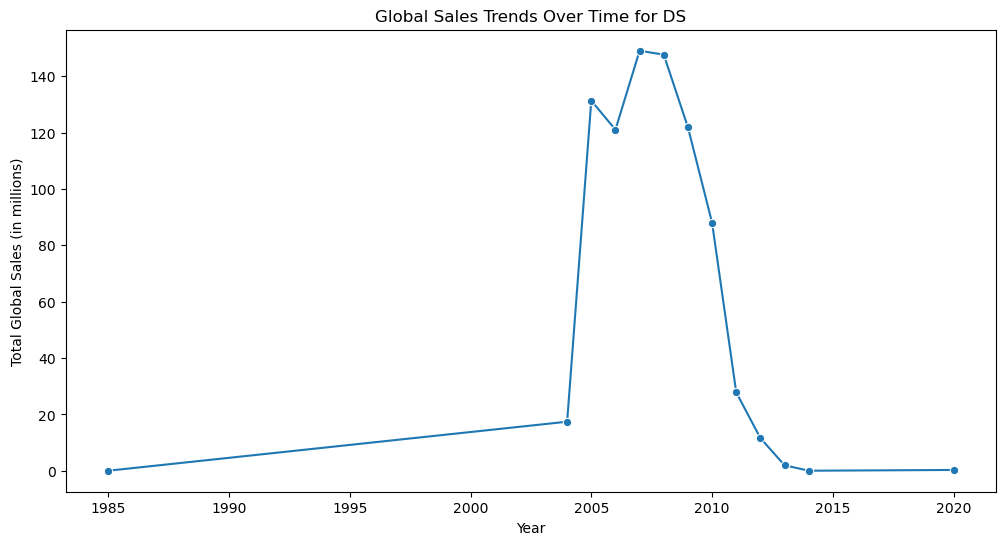

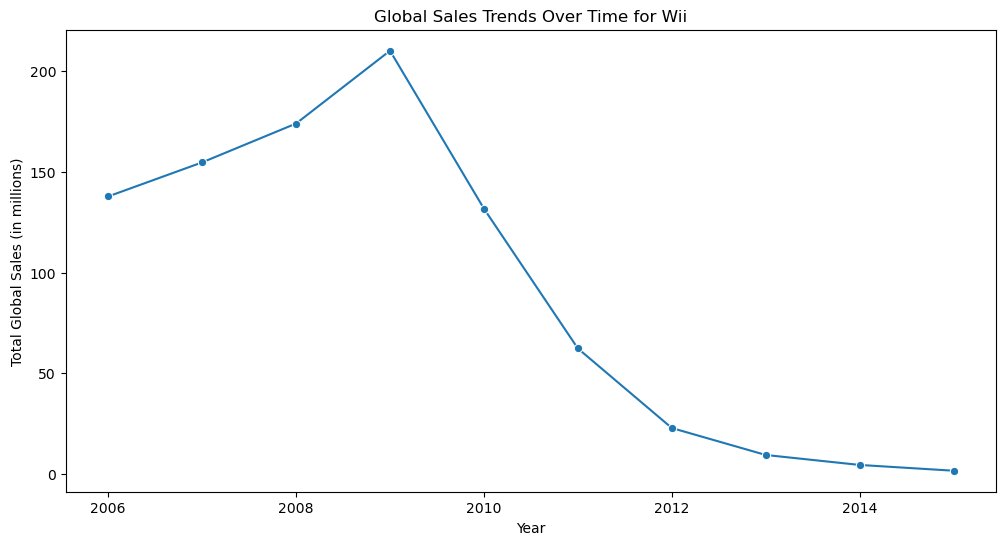

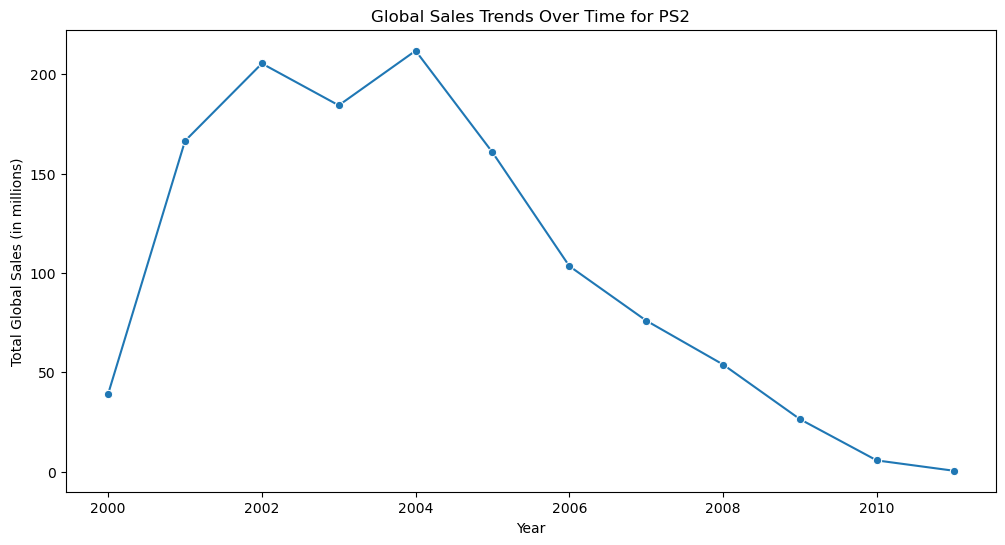

In [24]:
# 6. When were the most games released for each platform, and how did sales trend over time for those platforms?
platform_yearly_counts = df.groupby(['Platform', 'Year']).size().reset_index(name='Game_Count')
most_games_per_platform = platform_yearly_counts.loc[platform_yearly_counts.groupby('Platform')['Game_Count'].idxmax()]
most_games_per_platform = most_games_per_platform.sort_values(by='Game_Count', ascending=False).reset_index(drop=True).head(3) # Adjust to show top N
# Display results
for index, row in most_games_per_platform.iterrows():
    print(f'The platform {row["Platform"]} had the most game releases in the year {row["Year"]} with {row["Game_Count"]} games released.')
print(f'\nThe overall platform with the most game releases was {most_games_per_platform.iloc[0]["Platform"]} in {most_games_per_platform.iloc[0]["Year"]} with {most_games_per_platform.iloc[0]["Game_Count"]} games released.')
# Analyze sales trends over time for these platforms
platform_yearly_trends = df.groupby(['Platform', 'Year'])['Global_Sales'].sum().round(2).reset_index()
most_platform_yearly_trends = platform_yearly_trends[platform_yearly_trends['Platform'].isin(most_games_per_platform['Platform'])]
# Visualization of sales trends over time for these platforms
for platform in most_games_per_platform['Platform']:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=most_platform_yearly_trends[most_platform_yearly_trends['Platform'] == platform], x='Year', y='Global_Sales', marker='o')
    plt.title(f'Global Sales Trends Over Time for {platform}')
    plt.ylabel('Total Global Sales (in millions)')
    plt.xlabel('Year')
    plt.show()


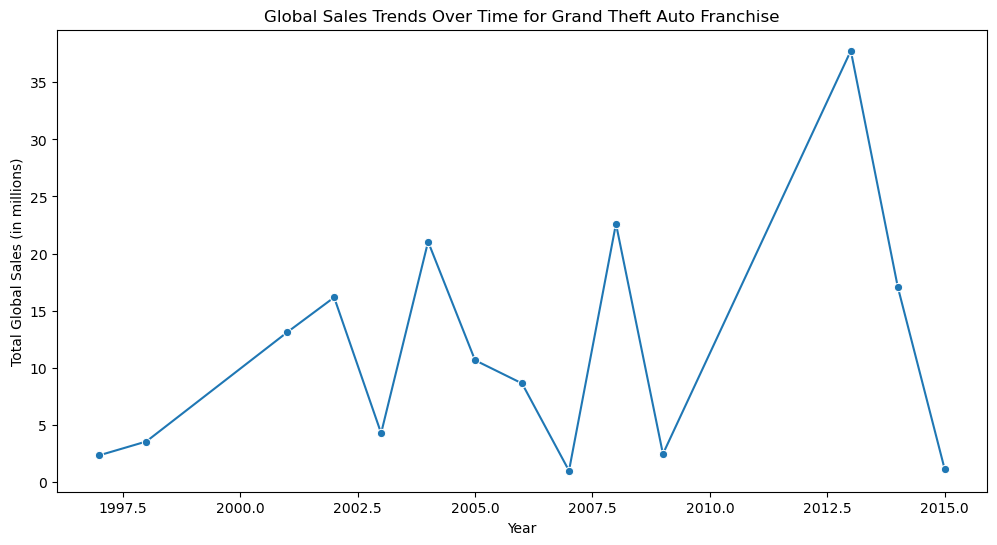

Grand Theft Auto Franchise Yearly Sales:
    Year  Global_Sales
0   1997          2.32
1   1998          3.53
2   2001         13.10
3   2002         16.16
4   2003          4.26
5   2004         21.04
6   2005         10.65
7   2006          8.62
8   2007          0.97
9   2008         22.61
10  2009          2.44
11  2013         37.77
12  2014         17.07
13  2015          1.08



In [25]:
# 7. When do multi-year franchises (e.g. FIFA, Call of Duty, Grand Theft Auto) see sales decline, and how long do top selling games maintain relevance?
contains = ['Grand Theft Auto'] # 'FIFA', 'Call of Duty', 'Pokemon', 'The Legend of Zelda', 'Mario', 'Final Fantasy'
for franchise in contains:
    franchise_sales = df[df['Name'].str.contains(franchise, case=False, na=False)]
    if not franchise_sales.empty:
        franchise_yearly_sales = franchise_sales.groupby('Year')['Global_Sales'].sum().reset_index()
        plt.figure(figsize=(12,6))
        sns.lineplot(data=franchise_yearly_sales, x='Year', y='Global_Sales', marker='o')
        plt.title(f'Global Sales Trends Over Time for {franchise} Franchise')
        plt.ylabel('Total Global Sales (in millions)')
        plt.xlabel('Year')
        plt.show()
        print(f'{franchise} Franchise Yearly Sales:\n{franchise_yearly_sales}\n')
    else:
        print(f'No sales data found for {franchise} franchise.\n')

Where Questions:

In [26]:
# 8. Where generates the highest sales for Action genres, and what percentage comes from Japan vs. North America?
action_sales = df[df['Genre'] == 'Action']
action_regions = action_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().round(2)
print(f'Action genre sales by region:\n{action_regions}')
na_pct = (action_regions['NA_Sales'] / action_regions.sum() * 100).round(2)
jp_pct = (action_regions['JP_Sales'] / action_regions.sum() * 100).round(2)
print(f'Top region for Action genre sales: {action_regions.idxmax()} with sales of {action_regions.max()} million')
print(f'Percentage of Action genre sales from North America: {na_pct}%')
print(f'Percentage of Action genre sales from Japan: {jp_pct}%')

Action genre sales by region:
NA_Sales       861.80
EU_Sales       516.48
JP_Sales       158.66
Other_Sales    184.92
dtype: float64
Top region for Action genre sales: NA_Sales with sales of 861.8 million
Percentage of Action genre sales from North America: 50.05%
Percentage of Action genre sales from Japan: 9.21%


In [27]:
# 9. Where do Nintendo published games perform best relative to competitors, and which regions do they underperform?
nintendo_df = df[df['Publisher'] == 'Nintendo']
nintendo_region = nintendo_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().round(2)
nintendo_ratios = ((nintendo_region / nintendo_region[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()) * 100).round(2)
print(f'Nintendo sales by region:\n{nintendo_region}')
print(f'Nintendo sales as percentage of total sales by region:\n{nintendo_ratios}')
print(f'The region where Nintendo performs best is {nintendo_region.idxmax()} with sales of {nintendo_region.max()} million, which ratio is {nintendo_ratios.max()}%.')
print(f'The region where Nintendo underperforms the most is {nintendo_region.idxmin()} with sales of {nintendo_region.min()} million, which ratio is {nintendo_ratios.min()}%.')

Nintendo sales by region:
NA_Sales       815.75
EU_Sales       418.30
JP_Sales       454.99
Other_Sales     95.19
dtype: float64
Nintendo sales as percentage of total sales by region:
NA_Sales       45.72
EU_Sales       23.44
JP_Sales       25.50
Other_Sales     5.34
dtype: float64
The region where Nintendo performs best is NA_Sales with sales of 815.75 million, which ratio is 45.72%.
The region where Nintendo underperforms the most is Other_Sales with sales of 95.19 million, which ratio is 5.34%.


Sales growth by decade:
        NA_Sales  EU_Sales  JP_Sales  Other_Sales
Decade                                           
1980s     235.66     31.20    102.49         7.13
1990s     576.11    282.87    372.33        47.42
2000s    2408.91   1256.18    510.69       464.73
2010s    1112.48    838.87    298.79       269.71
2020s       0.27      0.00      0.00         0.02


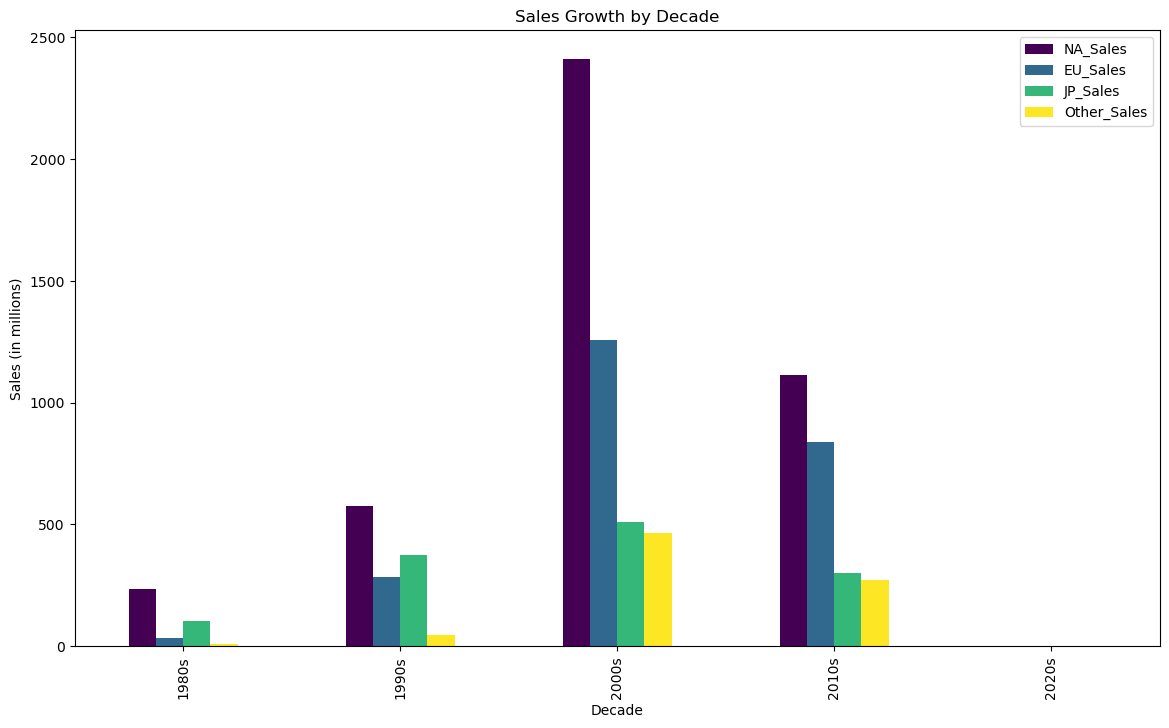

Sales growth from 1980s to 2010s:
NA_Sales       876.82
EU_Sales       807.67
JP_Sales       196.30
Other_Sales    262.58
dtype: float64

The most sales growth ratio from 1980s to 2010s:
Other_Sales with growth of 262.58 million, which ratio is 3682.75%.


In [28]:
# 10. Where have sales grown the most from 1980s to 2010s?
decade_sales = df.copy()
decade_sales['Decade'] = ((decade_sales['Year'] // 10) * 10).astype(str) +  's'
decade_sales_summary = decade_sales.groupby('Decade')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().round(2)
print(f'Sales growth by decade:\n{decade_sales_summary}')
# Visualization of sales growth by decade
decade_sales_summary[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='bar', figsize=(14,8), colormap='viridis')
plt.title('Sales Growth by Decade')
plt.ylabel('Sales (in millions)')
plt.xlabel('Decade')
plt.show()
# Correlation with platform adoption
growth1980s_2010s = decade_sales_summary.loc['2010s'] - decade_sales_summary.loc['1980s']
print(f'Sales growth from 1980s to 2010s:\n{growth1980s_2010s}')
# Where did the most growth occur?
growth1980s_2010s_ratio = (growth1980s_2010s / decade_sales_summary.loc['1980s'] * 100).round(2)
print(f'\nThe most sales growth ratio from 1980s to 2010s:\n{growth1980s_2010s_ratio.idxmax()} with growth of {growth1980s_2010s.loc[growth1980s_2010s_ratio.idxmax()]} million, which ratio is {growth1980s_2010s_ratio.max()}%.')


The highest sales growth rate from 1980s to 2010s is in Other regions with a growth of 262.58 million, which ratio is 3682.75%, following that is Europe with a growth of 807.67 million and a ratio of 2588.69%. This indicates a significant increase in sales in Other regions over the decades, suggesting that these markets have expanded rapidly and may offer new opportunities for game publishers and developers.

The North America and Europe regions are not the highest growth regions from 1980s to 2010s, but the sales values have significantly increased from 1980s to 2010s. With an increase of 876.82 million and a growth rate of 372.07% for North America, and an increase of 807.67 million and a growth rate of 2588.69% for Europe, these regions remain dominant markets for video game sales despite not having the highest growth rates compared to Other regions and Japan in terms of percentage growth.

In [29]:
# 11. How do regional sales correlate with global success, and which geners show the strongest cross-regional appeal?
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
genres = df['Genre'].unique()
genre_high_correlation = {}
for genre in genres:
    genre_sales = df[df['Genre'] == genre]
    genre_correlation = genre_sales[sales_cols].corr().round(2)
    high_corr = genre_correlation['Global_Sales'].drop('Global_Sales').idxmax()
    genre_high_correlation[genre] = (high_corr, genre_correlation.loc[high_corr, 'Global_Sales'])
# Display results
genre_high_correlation = pd.DataFrame(genre_high_correlation).T
genre_high_correlation.columns = ['Region', 'Correlation_with_Global_Sales']
print(f'Genres with strongest cross-regional appeal:\n{genre_high_correlation}')

Genres with strongest cross-regional appeal:
                Region Correlation_with_Global_Sales
Sports        NA_Sales                          0.96
Platform      NA_Sales                          0.97
Racing        NA_Sales                          0.97
Role-Playing  NA_Sales                          0.94
Puzzle        NA_Sales                          0.93
Misc          NA_Sales                          0.93
Shooter       NA_Sales                          0.95
Simulation    EU_Sales                          0.94
Action        NA_Sales                          0.95
Fighting      NA_Sales                          0.95
Adventure     NA_Sales                          0.95
Strategy      NA_Sales                           0.9


The most genres with strong cross-regional appeal, as indicated by high correlations with global sales across multiple regions, are Sports, Platform, Racing, Role-Playing, Puzzle, Misc, Shooter, Simulation, Action, Fighting, Adventure, and Strategy. These genres tend to perform well in North America and Europe, suggesting they have broad international appeal and are likely to succeed in diverse markets. Those genres with high correlations across multiple regions indicate a strong cross-regional appeal, those regions are North America and Europe. Which means games in these genres are likely to perform  well in both North American and European markets high correlations with global sales across multiple regions.

How Questions:

In [30]:
# 12. How much do multi-platform releases boost total global sales compared to platform games?
multi_platform = df.groupby('Name')['Platform'].nunique()
multi_names = multi_platform[multi_platform > 1].index
multi_sales = df[df['Name'].isin(multi_names)]['Global_Sales'].sum().round(2)
single_sales = df[~df['Name'].isin(multi_names)]['Global_Sales'].sum().round(2)
boost = ((multi_sales / len(multi_names)) / (single_sales / (df.shape[0] - len(multi_names))) * 100).round(2)
print(f'Total global sales from multi-platform releases: {multi_sales} million (average per game: {(multi_sales / len(multi_names)).round(2)}.)')
print(f'Total global sales from single-platform releases: {single_sales} million (average per game: {(single_sales / (df.shape[0] - len(multi_names))).round(2)}.)')
print(f'Boost in sales from multi-platform releases: {boost} %')

Total global sales from multi-platform releases: 4602.13 million (average per game: 1.69.)
Total global sales from single-platform releases: 4213.73 million (average per game: 0.31.)
Boost in sales from multi-platform releases: 547.09 %


Shooter sales in 2000s: 434.39 million


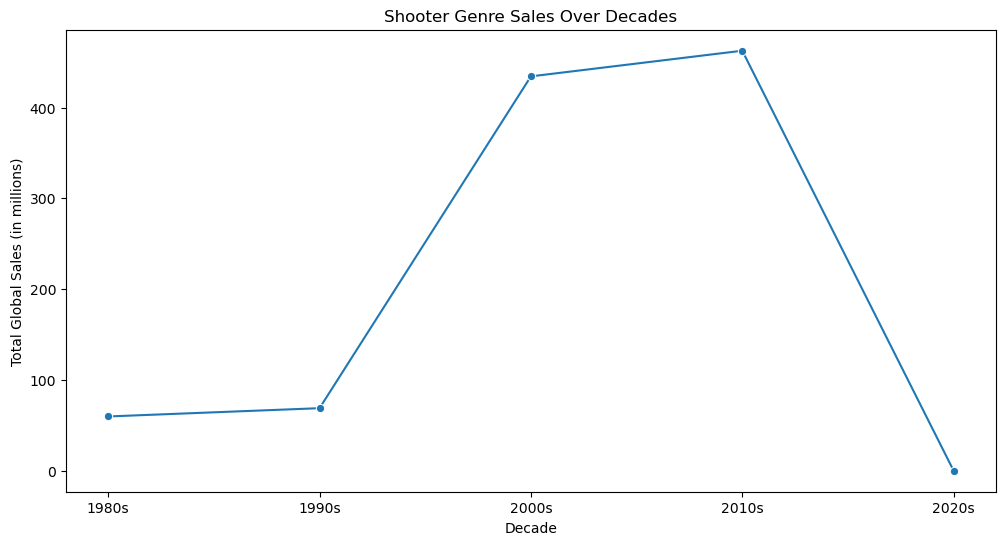

Top platforms for Shooter genre:
Platform
X360    277.14
PS3     195.79
PS2     108.20
Name: Global_Sales, dtype: float64
Top publishers for Shooter genre:
Publisher
Activision                295.31
Electronic Arts           158.31
Microsoft Game Studios     95.44
Name: Global_Sales, dtype: float64


In [31]:
# 13. How has the distribution of sales by genre evolved over time (e.g., rise of Shooters post 2000), and what factors (platform/publisher) explain it?
genre_evo = decade_sales.groupby(['Decade', 'Genre'])['Global_Sales'].sum().unstack().fillna(0).round(2)
# Shooters rise: post-2000s
shooter_2000s = genre_evo.loc['2000s', 'Shooter']
print(f'Shooter sales in 2000s: {shooter_2000s} million')
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_evo, x=genre_evo.index, y='Shooter', marker='o')
plt.title('Shooter Genre Sales Over Decades')
plt.ylabel('Total Global Sales (in millions)')
plt.xlabel('Decade')
plt.show()
# Factors: Platform/Publisher
top_platforms = df[df['Genre'] == 'Shooter'].groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(3)
top_publishers = df[df['Genre'] == 'Shooter'].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(3)
print(f'Top platforms for Shooter genre:\n{top_platforms}')
print(f'Top publishers for Shooter genre:\n{top_publishers}')


The top platforms for the Shooter genre are X360, PS3, and PS2, with X360 leading in total sales. The top publishers are Activision, Electronic Arts, and Microsoft Game Studios, with Activision having the highest sales. These platforms and publishers likely succeed in the Shooter genre due to their strong game libraries, popular franchises, and effective marketing strategies that resonate with Shooter game enthusiasts.

In [32]:
# 14. What are the top 10 highest-selling games overall, and why (based on genre, platform, publisher, release year)?
top_10_games = df.nlargest(10, 'Global_Sales')[['Name', 'Genre', 'Platform', 'Publisher', 'Year', 'Global_Sales']]
print(f'Top 10 highest-selling games overall:\n{top_10_games}')

Top 10 highest-selling games overall:
                        Name         Genre Platform Publisher  Year  \
0                 Wii Sports        Sports      Wii  Nintendo  2006   
1          Super Mario Bros.      Platform      NES  Nintendo  1985   
2             Mario Kart Wii        Racing      Wii  Nintendo  2008   
3          Wii Sports Resort        Sports      Wii  Nintendo  2009   
4   Pokemon Red/Pokemon Blue  Role-Playing       GB  Nintendo  1996   
5                     Tetris        Puzzle       GB  Nintendo  1989   
6      New Super Mario Bros.      Platform       DS  Nintendo  2006   
7                   Wii Play          Misc      Wii  Nintendo  2006   
8  New Super Mario Bros. Wii      Platform      Wii  Nintendo  2009   
9                  Duck Hunt       Shooter      NES  Nintendo  1984   

   Global_Sales  
0         82.74  
1         40.24  
2         35.83  
3         33.00  
4         31.38  
5         30.26  
6         30.01  
7         29.01  
8         28.61  


These top 10 highest-selling games overall have achieved significant global sales, with "Wii Sports" leading the list with 82.74 million sales.

These games are predominantly from Nintendo, indicating the company's strong presence in the video game market. The genres of these top-selling games include Sports, Platform, Racing, Role-Playing, Puzzle, Misc, and Shooter, showcasing a variety of game types that appeal to a wide audience. The platforms for these games are mainly Wii and Nintendo's handheld consoles (NES, GB, DS), highlighting the popularity of Nintendo's hardware in driving game sales. The release years of these games range from 1984 to 2009, indicating that both classic and more recent titles have achieved significant sales figures. Overall, the success of these games can be attributed to their engaging gameplay, strong brand recognition, and the popularity of the Nintendo platform.

Conclusions

Insight conclusions:
The video game industry has seen significant growth and changes over the decades, with North America and Europe remaining dominant markets. The Action genre is the most popular across all regions, while Role-Playing games have a strong presence in Japan. Major publishers like Nintendo and Electronic Arts control a large portion of the market, with Nintendo excelling in the Role-Playing genre. The late 2000s were a peak period for game releases and sales, driven by platforms like DS and PS2. Multi-platform releases boost sales significantly compared to single-platform games. Overall, understanding regional preferences, genre popularity, and platform success can help developers and publishers tailor their strategies for better market performance.